# Diffie-Hellman

**Diffie-Hellman Key Exchange** is first public-key scheme proposed by Diffie & Hellamn in 1976, who exposed public-key concept (*indeed Williamson proposed secretly, in military environment, the concept in 1970*).

DH is a pratical method for public key echange of a secret key, commonly used in commercial products. Partecipants choose their private and public key information randomly and exchange only public key information in order to communicate.

DH is based on exponentation in a finite field (*Galois Field*) on modulo prime or a polynomial, that is easy to compute. Futhermore, it is hard to compute **discrete logarithms** on modulo prime to know exponent. (**TRAP-DOOR FUNCTION**)


## Math Background

### Primitive Roots

Recalling Euler's theorem:

$$\forall a,n \in N: GCD(a,n) = 1 \implies a^{\phi (n)} \mod n = 1$$

Suppose to exists $m$, that:

$$a^{m} \mod n = 1$$

Then:

$$\forall k > m : a^{m+k} \mod n = a^{k} \mod n$$

There is a cycle in module exponentation, if $m = \phi(n)$ then $a$ is a **primitive root** of n.

In [1]:
n = 19
# Print a table of all number exponentation between 1 and n
for a in range(1,n):
  isPrimitiveRoot = True
  v = [0] * (n-1)
  for k in range(1,n):
    v[k-1] = pow(a,k,n)
    if v[k-1] == 1 and k < (n-1):
      isPrimitiveRoot = False
      
  # Print in green if it is a primitive root, else print in red
  print("\u001b[32m" if isPrimitiveRoot else "\u001b[31m")
  print(v)
print("\u001b[0m")




[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

[2, 4, 8, 16, 13, 7, 14, 9, 18, 17, 15, 11, 3, 6, 12, 5, 10, 1]

[3, 9, 8, 5, 15, 7, 2, 6, 18, 16, 10, 11, 14, 4, 12, 17, 13, 1]

[4, 16, 7, 9, 17, 11, 6, 5, 1, 4, 16, 7, 9, 17, 11, 6, 5, 1]

[5, 6, 11, 17, 9, 7, 16, 4, 1, 5, 6, 11, 17, 9, 7, 16, 4, 1]

[6, 17, 7, 4, 5, 11, 9, 16, 1, 6, 17, 7, 4, 5, 11, 9, 16, 1]

[7, 11, 1, 7, 11, 1, 7, 11, 1, 7, 11, 1, 7, 11, 1, 7, 11, 1]

[8, 7, 18, 11, 12, 1, 8, 7, 18, 11, 12, 1, 8, 7, 18, 11, 12, 1]

[9, 5, 7, 6, 16, 11, 4, 17, 1, 9, 5, 7, 6, 16, 11, 4, 17, 1]

[10, 5, 12, 6, 3, 11, 15, 17, 18, 9, 14, 7, 13, 16, 8, 4, 2, 1]

[11, 7, 1, 11, 7, 1, 11, 7, 1, 11, 7, 1, 11, 7, 1, 11, 7, 1]

[12, 11, 18, 7, 8, 1, 12, 11, 18, 7, 8, 1, 12, 11, 18, 7, 8, 1]

[13, 17, 12, 4, 14, 11, 10, 16, 18, 6, 2, 7, 15, 5, 8, 9, 3, 1]

[14, 6, 8, 17, 10, 7, 3, 4, 18, 5, 13, 11, 2, 9, 12, 16, 15, 1]

[15, 16, 12, 9, 2, 11, 13, 5, 18, 4, 3, 7, 10, 17, 8, 6, 14, 1]

[16, 9, 11, 5, 4, 7, 17, 6, 1, 16, 9, 11, 5, 4, 7, 

If $n$ is a prime, set of powers by **primitive root** generates all residues of $n$, nevertheless a no primitive root can simplify calculation of discrete logarithm.

### Discrete Logarithm


Discrete logarithm $a \mod p$ is inverse of discrete exponentation:

$$ b = a^i \mod p $$

Discrete logarithm:

$$ i = \log_a b \mod p$$

$\text{If a is not a primitive root of p} \implies i \text{ could not exists}$

In [2]:
n = 19
a = 11 # No Primitive Root
b = 3
i = None
# Search in all exponent
for k in range(1,n):
  res = pow(a,k,n)
  if(res == b):
    i = k
    break
print(i)

None


$\text{If a is not a primitive root of p} \implies i \text{ surely exists}$



In [3]:
n = 19
a = 10 # Primitive Root
b = 3
i = None
# Search in all exponent
for k in range(1,n):
  res = pow(a,k,n)
  if(res == b):
    i = k
    break
print(i)

5


Discrete exponentation is really simply, instead discrete logarithm has an hard complexity, best algorithm is **General number field sieve**.

## Diffie-Hellman Setup

In the Diffie-Hellman key exchange algorithm, there are two publicly known numbers: 
- $q$ prime number 
- $a$ primitive root of q. 

Note that the primitive root $a$ is a number whose powers successively generate all the elements mod q.



In [4]:
import random
q = 0xFFFFFFFFFFFFFFFFC90FDAA22168C234C4C6628B80DC1CD129024E088A67CC74020BBEA63B139B22514A08798E3404DDEF9519B3CD3A431B302B0A6DF25F14374FE1356D6D51C245E485B576625E7EC6F44C42E9A637ED6B0BFF5CB6F406B7EDEE386BFB5A899FA5AE9F24117C4B1FE649286651ECE45B3DC2007CB8A163BF0598DA48361C55D39A69163FA8FD24CF5F83655D23DCA3AD961C62F356208552BB9ED529077096966D670C354E4ABC9804F1746C08CA237327FFFFFFFFFFFFFFFF
a = 2

Alice and Bob generates theirs key:

- choosing a secret number $x_a \lt q $ 
- computing their public key $y_a = a^{x_a} \mod q$



Alice:

In [5]:
xa = random.randint(1,q-1)
ya = pow(a,xa,q)
print(ya)

2328859373960470365400113250629236090839494961971236743987550543159703095900818242257873491448391681983388357054009770887789730628106585890418251328340811931503920452508592307179659117721099649494285465184527969391418436285742081514654089813912611942244922606518456222153128242760302746615928462898684062566740451854903614641061557350079225172546674170132353591900667172920640079096725284024554210579358595327452182421918167628935721727701935500228540264971855492


Bob:

In [6]:
xb = random.randint(1,q-1)
yb = pow(a,xb,q)
print(yb)

196440691042602834525056796877620478101678809065713230346998489261278496283843479316307467660569988047386904311462328145320018827153506123091478490078164120284373770490000084487257902030759260726521508460331706948290248152465509249974575921006223052357022884146974220683493412503836810884064559353866568609580525648603505748311418384958471125244332082483987654549206977971138613218560621944030474402762742591376515136522258739089132945218787944344314989585101277


An attacker could easily retrieve public key $y_a$ but he/she cannot recover $x_a$ easily.

## Diffie-Hellman Key Exchange

The actual key exchange for either party consists of raising the others "public key' to power of their private key. 

**Shared Key**:

$$K_{ab} = a^{x_a \cdot x_b} \mod q$$

Alice can easily compute it throught Bob public key and own private number

$$y_b^{x_a} \mod q = K_{ab}$$

In [7]:
Ka = pow(yb,xa,q)
print(Ka)

602597074566960626653882900354758907772354068106958648433679648056719568465570704923107484063077136398246441751260425813058857915880325244055687112452065395232915029635892966130846693221325843507679898459530330609690084146492228413070902535857821143883965564579711083300635430616527781093833999886596184277593839837168427123648113447482872899839156753204879501616980589672284918051013611523962794097981111648053312234658527720514628773051807801337681755229224138


Bob can also compute it throught Alice public key and own private number:

$$y_a^{x_b} \mod q = K_{ab}$$

In [8]:
Kb = pow(ya,xb,q)
print(Kb)

602597074566960626653882900354758907772354068106958648433679648056719568465570704923107484063077136398246441751260425813058857915880325244055687112452065395232915029635892966130846693221325843507679898459530330609690084146492228413070902535857821143883965564579711083300635430616527781093833999886596184277593839837168427123648113447482872899839156753204879501616980589672284918051013611523962794097981111648053312234658527720514628773051807801337681755229224138


The resulting number (or as much of as is necessary) is used as the key for a block cipher or other private key scheme.

For an attacker to obtain the same value they need at least one of the secret numbers, which means solving a discrete log, which is computationally infeasible given large enough numbers.

## Diffie-Hellman Protocol

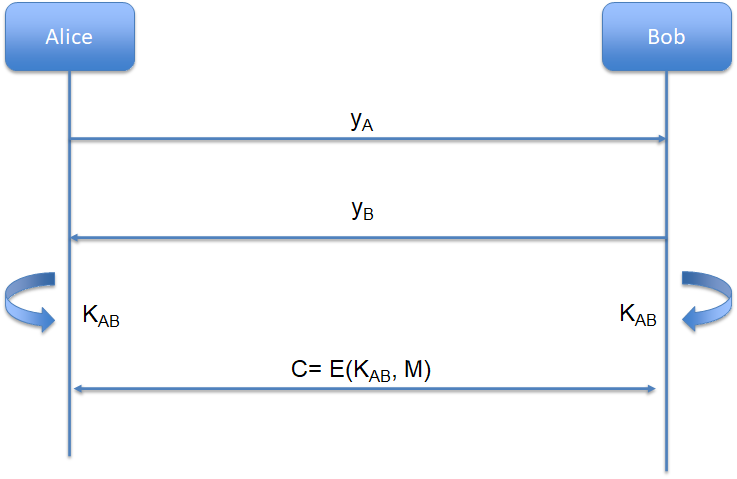

Diffie-Hellman provides to share a key in a secure way online, nevertheless this protocol is vulnerable to MITM attack.



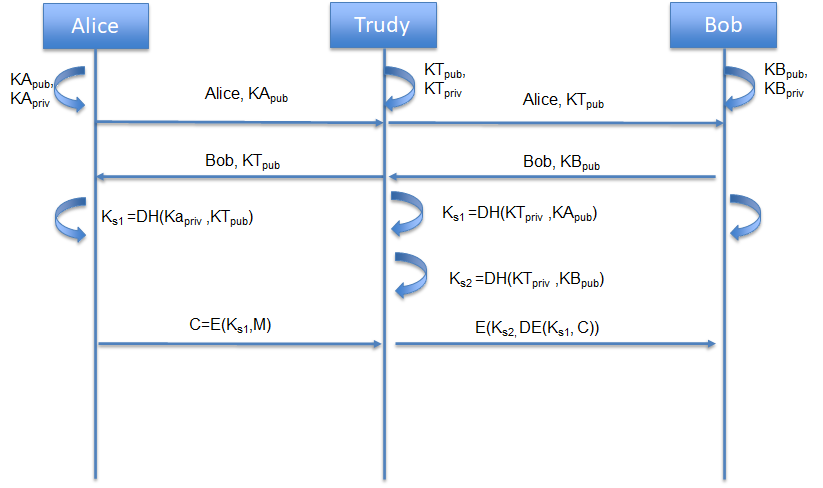

Alice and Bob identity can be proved, an attacker can stay in the middle and share a key for each party. Alice and Bob will not notify nothing, because attacker can encrypt and decrypt messages arbitrary.